In [ ]:
## install
!pip install gspread

In [ ]:
import gspread
from google.colab import auth
from google.auth import default
auth.authenticate_user()
creds, _ = default()
client = gspread.authorize(creds)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np


In [ ]:
file_id = ""
survey_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv")

In [ ]:
survey_df.head()

,Timestamp,Email,What programming language do you use most frequently?,Have you used LLM models to assist you writing code?,What LLM models do you usually use ?,What issues have you encountered in the LLM generated code?,"What is your current job title? For students, please indicate your degree: Master's, PhD, etc.",What is your coding experience?,"How often do you encounter Wrong Logic inefficiencies in LLM-generated code?\n\nAll scores are given on a scale from 1 to 5, where 1 indicates a rare occurrence and 5 indicates a frequent occurrence.","To Which extent Wrong Logic is relevant to be considered?\n \nAll scores are given on a scale from 1 to 5, with 1 indicates low importance and 5 indicates high importance.\n",...,"Do you have any additional comment, feedback or suggestion regarding Missing Import?","How often do you encounter Missing Variable Declaration inefficiencies in LLM-generated code?\n\nAll scores are given on a scale from 1 to 5, where 1 indicates a rare occurrence and 5 indicates a frequent occurrence.","To which extent Missing Variable Declaration is relevant to be considered? \n\nAll scores are given on a scale from 1 to 5, with 1 indicates low importance and 5 indicates high importance.","Do you have any additional comment, feedback or suggestion regarding Missing Variable Declaration?","How often do you encounter Syntax Error inefficiencies in LLM-generated code?\n\nAll scores are given on a scale from 1 to 5, where 1 indicates a rare occurrence and 5 indicates a frequent occurrence.","To which extent Syntax Error is relevant to be considered?\n \nAll scores are given on a scale from 1 to 5, with 1 indicates low importance and 5 indicates high importance.","Do you have any additional comment, feedback or suggestion regarding Syntax Error?","To which extent Error is relevant to be considered?\n \nAll scores are given on a scale from 1 to 5, with 1 indicates low importance and 5 indicates high importance.",Have you encountered other inefficiencies in the Error category that you believe have not been mentioned?,"Do you believe you encountered any other inefficiencies that were not mentioned? If yes, please provide them in the text below."
0,12/17/2024 18:06:31,yatsenkoa2020@gmail.com,"Python, C/C++",Yes,"ChatGPT, Claude","When using LLM code generation for debugging, ...",Machine Learning Engineer,1-3 years,1,1,...,NaN,3,3,NaN,1,2,NaN,3,NaN,NaN
1,12/17/2024 18:09:47,ba2512005@gmail.com,Python,Yes,"Copilot, ChatGPT, Mistral",It basically guesses at what the code should b...,Cyber Security consultant,More than 5 years,4,5,...,Sometimes imports things that doesn’t exist,3,3,NaN,3,4,Depends on python version as well,3,NaN,Handling corner cases or error handling is not...
2,12/17/2024 19:12:17,404.idontexist@gmail.com,Python,No,"ChatGPT, Gimini","odd formatting, newlines in mixed format, refe...",High School,More than 5 years,3,5,...,NaN,3,3,NaN,1,3,NaN,4,NaN,NaN
3,12/17/2024 19:30:09,jules.perrin@epfl.ch,"Python, C/C++, Verilog, Scala",Yes,Claude,"Incorrect code, weird/unoptimize way of doing ...",Master student,More than 5 years,2,5,...,"Annoying to ask again, but not horrible",3,5,A bit more annoying,3,3,NaN,4,NaN,NaN
4,12/17/2024 19:54:32,rinkulukat@gmail.com,"Python, C/C++",Yes,"ChatGPT, Gimini",Cannot support large enough context - the prob...,Bachelor’s degree,3-5 years,1,3,...,Unless you prompt the LLM to generate an entir...,1,1,NaN,1,1,NaN,5,Using inexistent library functions and methods...,NaN


In [ ]:
## programming language
language = survey_df.iloc[:, 2].str.split(',').explode().str.strip().tolist()
c_language = Counter(language)
total_count = len(survey_df)
percentages = {key: round((value / total_count) * 100,2) for key, value in c_language.items()}
sorted_percentages = dict(sorted(percentages.items(), key=lambda item: item[1], reverse=True))
print(sorted_percentages)


{'Python': 91.38, 'C/C++': 18.97, 'JavaScript': 18.97, 'Java': 8.62, 'GO': 3.45, 'Verilog': 1.72, 'Scala': 1.72, 'Bash': 1.72, 'SQL': 1.72, 'Matlab': 1.72, 'shell': 1.72, 'Elixir': 1.72, 'Ruby': 1.72, 'typescript': 1.72}


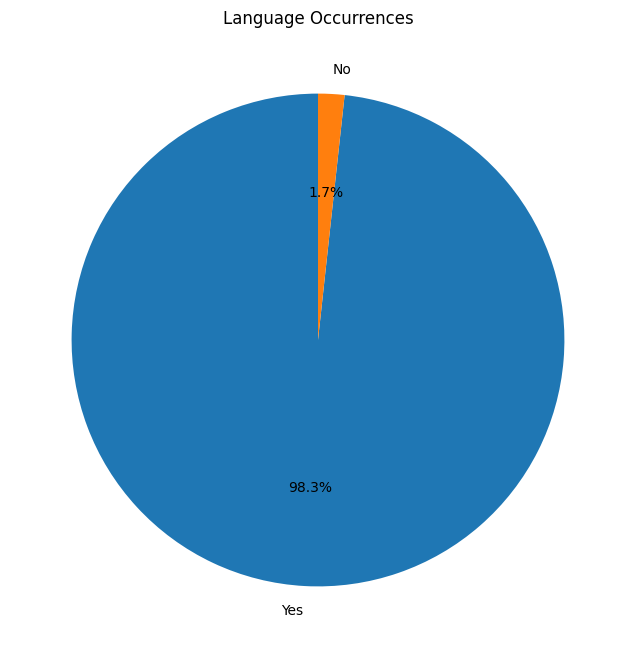

In [ ]:
## years of experience
experience = survey_df.iloc[:, 3].value_counts()
plt.figure(figsize=(8, 8))
experience.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Language Occurrences')
plt.ylabel('')  # Remove y-axis label for clarity
plt.show()

In [ ]:
## LLM model you use
# Extract the LLM column, split, and clean the data
llm = survey_df.iloc[:, 4].str.split(',').explode().str.strip().tolist()
llm = [item.replace("Gimini", "Gemini") for item in llm]
llm = [item.replace("Cloude", "Claude") for item in llm]
llm = [item.replace("claude", "Claude") for item in llm]
llm = [item.replace("phi3.5", "phi") for item in llm]
llm = [item.replace("phi3", "phi") for item in llm]
llm = [item.replace("qwen2.5-coder 7b", "qwen2.5-coder") for item in llm]
llm = [item.replace("Qwen2.5-Coder-32B-Instruct", "qwen2.5-coder") for item in llm]
c_llm = Counter(llm)
total_count = len(survey_df)
percentages = {key: round((value / total_count) * 100,2) for key, value in c_llm.items()}
sorted_percentages = dict(sorted(percentages.items(), key=lambda item: item[1], reverse=True))
print(sorted_percentages)

{'ChatGPT': 89.66, 'Copilot': 29.31, 'Gemini': 17.24, 'Claude': 13.79, 'Mistral': 5.17, 'phi': 3.45, 'qwen2.5-coder': 3.45, 'DeepSeek': 1.72, 'GGUF models from HF': 1.72, 'Codestral': 1.72, 'Llama 3.1': 1.72, 'aider in combination with a local LLMs (note I mostly use small language models)': 1.72}


In [ ]:
## current job


In [ ]:
## coding experience

In [ ]:
## big plot
categories = ["General Logic", "Perfomance", "Readability", "Maintainability", "Errors"]
sub_categories  = ["GL-Wrong Logic", "GL-Partially Wrong Logic", "GL-Wrong Method Input",
                 "P-Sub-Optimal Solution (Memory)", "P-Sub-Optimal Time Complexity", "P-Unnecessary Steps", "P-Redundant Steps", "P-Inefficient Repetitive Block",
                 "R-Confusing Naming", "R-Sub-Readable Code Exists",
                 "M-Code Duplication", "M-Comment Duplication", "M-Unnecessary Conditional Block", "M-Unnecessary Else",
                 "E-Missing Import", "E-Missing Variable Declaration", "E-Syntax Error"
                 ]

In [ ]:
survey_df.columns[58]

'How often do you encounter Missing Import inefficiencies in LLM-generated code?\n\nAll scores are given on a scale from 1 to 5, where 1 indicates a rare occurrence and 5 indicates a frequent occurrence.'

In [ ]:
categories_relevance = [
    survey_df.iloc[:,17].mean(),
    survey_df.iloc[:,34].mean(),
    survey_df.iloc[:,42].mean(),
    survey_df.iloc[:,56].mean(),
    survey_df.iloc[:,67].mean(),
]

In [ ]:
sub_categories_freq = [
    ## General Logic
    survey_df.iloc[:,8].mean(),
    survey_df.iloc[:,11].mean(),
    survey_df.iloc[:,14].mean(),

    ## Performance
    survey_df.iloc[:,19].mean(),
    survey_df.iloc[:,22].mean(),
    survey_df.iloc[:,25].mean(),
    survey_df.iloc[:,28].mean(),
    survey_df.iloc[:,31].mean(),

    ## Readability
    survey_df.iloc[:,36].mean(),
    survey_df.iloc[:,39].mean(),


    ## Maintainability
    survey_df.iloc[:,44].mean(),
    survey_df.iloc[:,47].mean(),
    survey_df.iloc[:,50].mean(),
    survey_df.iloc[:,53].mean(),

    ## Errors
    survey_df.iloc[:,58].mean(),
    survey_df.iloc[:,61].mean(),
    survey_df.iloc[:,64].mean()
]

In [ ]:
sub_categories_rev = [
    ## General Logic
    survey_df.iloc[:,9].mean(),
    survey_df.iloc[:,12].mean(),
    survey_df.iloc[:,15].mean(),

    ## Performance
    survey_df.iloc[:,20].mean(),
    survey_df.iloc[:,23].mean(),
    survey_df.iloc[:,26].mean(),
    survey_df.iloc[:,29].mean(),
    survey_df.iloc[:,32].mean(),

    ## Readability
    survey_df.iloc[:,37].mean(),
    survey_df.iloc[:,40].mean(),


    ## Maintainability
    survey_df.iloc[:,45].mean(),
    survey_df.iloc[:,48].mean(),
    survey_df.iloc[:,51].mean(),
    survey_df.iloc[:,54].mean(),

    ## Errors
    survey_df.iloc[:,59].mean(),
    survey_df.iloc[:,62].mean(),
    survey_df.iloc[:,65].mean(),
]

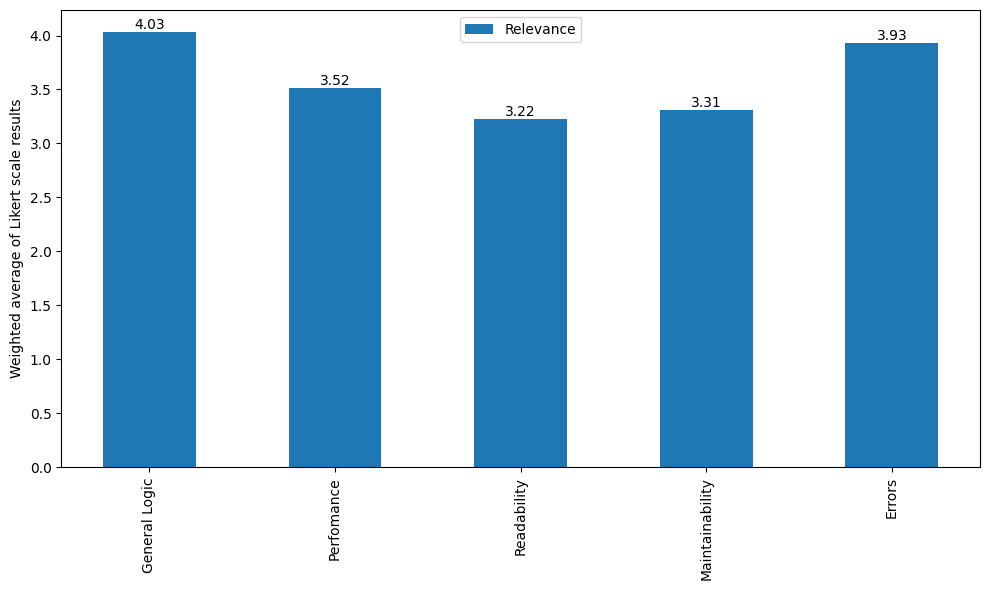

In [ ]:
x = np.arange(len(categories))  # The label positions on the x-axis
width = 0.5  # The width of the bars

plt.figure(figsize=(10, 6))

# Bars for relevance
bars = plt.bar(x, categories_relevance, width, label='Relevance')

plt.ylabel('Weighted average of Likert scale results')
plt.xticks(x, categories, rotation=90)
plt.tight_layout()
plt.legend()

# Annotate relevance bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.savefig('categories_with_values.pdf', format='pdf')


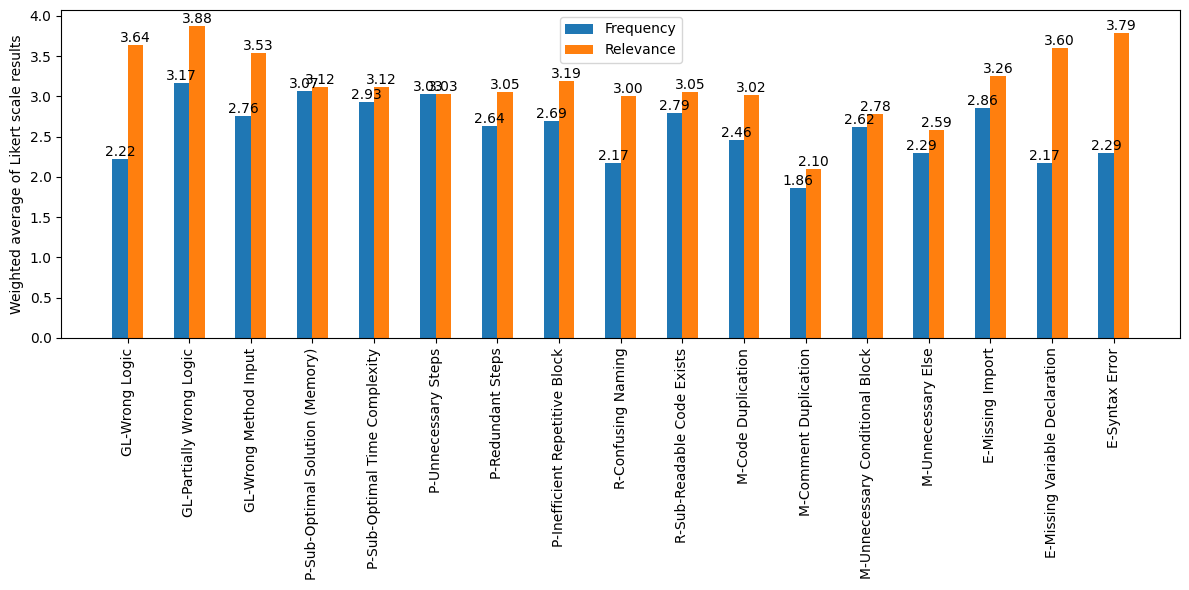

In [ ]:
x = np.arange(len(sub_categories))  # The label positions on the x-axis
width = 0.25  # The width of the bars

plt.figure(figsize=(12, 6))

# Bars for frequency
bars1 = plt.bar(x - width/2, sub_categories_freq, width, label='Frequency')

# Bars for relevance
bars2 = plt.bar(x + width/2, sub_categories_rev, width, label='Relevance')

plt.ylabel('Weighted average of Likert scale results')
plt.xticks(x, sub_categories, rotation=90)
plt.tight_layout()
plt.legend()

# Annotate frequency bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Annotate relevance bars
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.savefig('bar_plot_comparison_with_values.pdf', format='pdf')
